In [14]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


In [15]:
hr=pd.read_csv('HR_comma_sep.csv')
print(hr.dtypes)
hr.describe()

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000
mean,0.612890,0.716108,3.803001,201.050150,3.498166,0.144648,0.237879,0.021274
std,0.248615,0.171166,1.232266,49.943356,1.460262,0.351758,0.425799,0.144300
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [16]:
dum_hr=pd.get_dummies(hr,drop_first=True)
x=dum_hr.drop('left',axis=1)
y=dum_hr['left']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25)

In [18]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_prob=lr.predict_proba(X_test)

C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
ypred=y_pred_prob.argmax(axis=1)
print(y_pred_prob)
print(ypred)

[[0.61099181 0.38900819]
 [0.61344312 0.38655688]
 [0.5404661  0.4595339 ]
 ...
 [0.94840852 0.05159148]
 [0.9446712  0.0553288 ]
 [0.78286529 0.21713471]]
[0 0 0 ... 0 0 0]


NameError: name 'plt' is not defined

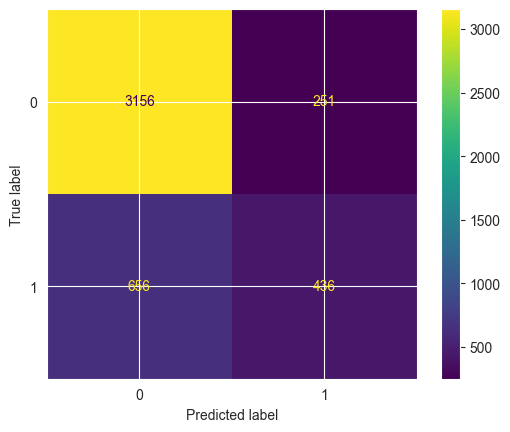

In [22]:
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,ypred))
disp.plot()
plt.show()

In [23]:
accuracy_score(y_test,ypred)

0.7983996443654146

In [24]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)#applies argmax to predicted probability matrix
accuracy_score(y_test,ypred)

C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7983996443654146

In [25]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25,stratify=y)
y_train.value_counts(normalize=True)*100

left
0    76.209985
1    23.790015
Name: proportion, dtype: float64

In [26]:
dum_hr=pd.get_dummies(hr,drop_first=True)
x=dum_hr.drop('left',axis=1)
y=dum_hr['left']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25,stratify=y)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,ypred)

C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6828184040897978

In [28]:
dum_hr=pd.get_dummies(hr,drop_first=True)
x=dum_hr.drop('left',axis=1)
y=dum_hr['left']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25,stratify=y)
lr = LogisticRegression(penalty='l1',solver='liblinear')
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,ypred)

0.6828184040897978

In [29]:
dum_hr=pd.get_dummies(hr,drop_first=True)
x=dum_hr.drop('left',axis=1)
y=dum_hr['left']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25,stratify=y)
lr = LogisticRegression(penalty='l2',solver='liblinear')
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,ypred)

0.6828184040897978

In [35]:
solver='saga'
penalties=['l1','l2','elasticnet',None]
scores=[]
for p in penalties:
    lr=LogisticRegression(solver=solver,penalty=p,l1_ratio=.5)
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    scores.append([p,accuracy_score(y_test,y_pred)])
df_scores=pd.DataFrame(scores,columns=['penalty','score'])
df_scores.sort_values('score',ascending=False)

C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge

,penalty,score
0,l1,0.757724
1,l2,0.757724
2,elasticnet,0.757724
3,None,0.757724


In [42]:
solver=['sag','newton-cg','newton-cholesky','lbfgs']
penalties=['l2',None]
scores=[]
for p in penalties:
    for s in solver:
        lr=LogisticRegression(solver=s,penalty=p,l1_ratio=.5)
        lr.fit(X_train,y_train)
        y_pred=lr.predict(X_test)
        scores.append([p,s,accuracy_score(y_test,y_pred)])
df_scores=pd.DataFrame(scores,columns=['penalty','solver','score'])
df_scores.sort_values('score',ascending=False)

C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'e

,penalty,solver,score
7,None,lbfgs,0.809291
3,l2,lbfgs,0.807735
1,l2,newton-cg,0.799733
5,None,newton-cg,0.799289
6,None,newton-cholesky,0.799066
2,l2,newton-cholesky,0.799066
0,l2,sag,0.750834
4,None,sag,0.750834


In [44]:
cancer=pd.read_csv("BreastCancer.csv")
y=cancer['Class']
x=cancer.drop(['Class','Code'],axis=1)

In [45]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25,stratify=y)

In [46]:
solver='saga'
penalties=['l1','l2','elasticnet',None]
scores=[]
for p in penalties:
    lr=LogisticRegression(solver=solver,penalty=p,l1_ratio=.5)
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    scores.append([p,accuracy_score(y_test,y_pred)])
df_scores=pd.DataFrame(scores,columns=['penalty','score'])
df_scores.sort_values('score',ascending=False)

C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge

,penalty,score
0,l1,0.966667
1,l2,0.966667
2,elasticnet,0.966667
3,None,0.966667


In [47]:
solver = ['sag', 'newton-cg', 'newton-cholesky', 'lbfgs']
penalties = ['l2', None]
scores = []
for p in penalties:
    for s in solver:
        lr = LogisticRegression(solver=s, penalty=p, l1_ratio=.5)
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)
        scores.append([p, s, accuracy_score(y_test, y_pred)])
df_scores = pd.DataFrame(scores, columns=['penalty', 'solver', 'score'])
df_scores.sort_values('score', ascending=False)


C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'e

,penalty,solver,score
0,l2,sag,0.966667
1,l2,newton-cg,0.966667
2,l2,newton-cholesky,0.966667
3,l2,lbfgs,0.966667
4,None,sag,0.966667
5,None,newton-cg,0.966667
6,None,newton-cholesky,0.966667
7,None,lbfgs,0.966667


In [48]:
glass=pd.read_csv("Glass.csv")
y=glass['Type']
x=glass.drop('Type',axis=1)


In [49]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25,stratify=y)

In [50]:
solver = 'saga'
penalties = ['l1', 'l2', 'elasticnet', None]
scores = []
for p in penalties:
    lr = LogisticRegression(solver=solver, penalty=p, l1_ratio=.5)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    scores.append([p, accuracy_score(y_test, y_pred)])
df_scores = pd.DataFrame(scores, columns=['penalty', 'score'])
df_scores.sort_values('score', ascending=False)


C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge

,penalty,score
0,l1,0.538462
1,l2,0.538462
2,elasticnet,0.538462
3,None,0.538462


In [51]:
solver = ['sag', 'newton-cg', 'newton-cholesky', 'lbfgs']
penalties = ['l2', None]
scores = []
for p in penalties:
    for s in solver:
        lr = LogisticRegression(solver=s, penalty=p, l1_ratio=.5)
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)
        scores.append([p, s, accuracy_score(y_test, y_pred)])
df_scores = pd.DataFrame(scores, columns=['penalty', 'solver', 'score'])
df_scores.sort_values('score', ascending=False)


C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'e

,penalty,solver,score
1,l2,newton-cg,0.661538
2,l2,newton-cholesky,0.661538
3,l2,lbfgs,0.661538
5,None,newton-cg,0.630769
6,None,newton-cholesky,0.630769
7,None,lbfgs,0.615385
4,None,sag,0.538462
0,l2,sag,0.523077


In [63]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
glass=pd.read_csv("Glass.csv")
x=glass.drop('Type',axis=1)
le=LabelEncoder()
y=le.fit_transform(glass['Type'])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [64]:
le.classes_

array(['building_windows_float_processed',
       'building_windows_non_float_processed', 'containers', 'headlamps',
       'tableware', 'vehicle_windows_float_processed'], dtype=object)

In [65]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25,stratify=y)

In [66]:
lr=LogisticRegression(solver='newton-cg',penalty='l2')
lr.fit(X_train,y_train)
y_pred_prob=lr.predict_proba(X_test)
y_pred=lr.predict(X_test)

In [67]:
y_pred

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 3, 0, 1, 4, 3, 0, 3, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 2, 0, 1, 2, 3, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0,
       3, 1, 1, 1, 1, 3, 1, 1, 0, 0, 1, 1, 3, 3, 0, 0, 3, 1, 1, 0, 1])

In [68]:
accuracy_score(y_test,y_pred)

0.6615384615384615

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68        21
           1       0.61      0.74      0.67        23
           2       0.50      0.50      0.50         4
           3       0.89      0.89      0.89         9
           4       1.00      0.33      0.50         3
           5       0.00      0.00      0.00         5

    accuracy                           0.66        65
   macro avg       0.61      0.53      0.54        65
weighted avg       0.63      0.66      0.63        65



C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

In [70]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [72]:
a=np.array([[23,678,0.3],
            [54,832,0.4],
            [34,993,0.7],
            [78,321,0.8]])
df=pd.DataFrame(a,columns=['X1','X2','X3'])
df

,X1,X2,X3
0,23.0,678.0,0.3
1,54.0,832.0,0.4
2,34.0,993.0,0.7
3,78.0,321.0,0.8


In [74]:
scaler=StandardScaler().set_output(transform='pandas')
scaler.fit(df)#computes mean and sd of every column

,copy,True
,with_mean,True
,with_std,True


In [75]:
df_scl=scaler.transform(df)
df_scl

,X1,X2,X3
0,-1.157802,-0.112620,-1.212678
1,0.322275,0.506791,-0.727607
2,-0.632613,1.154357,0.727607
3,1.468140,-1.548528,1.212678


In [77]:
df_scl['X1'].mean()

np.float64(-5.551115123125783e-17)

In [78]:
df_scl['X2'].mean()

np.float64(-5.551115123125783e-17)

In [79]:
df_scl['X3'].mean()

np.float64(-2.7755575615628914e-16)

In [80]:
df_scl['X1'].std()

np.float64(1.1547005383792515)

In [81]:
df_scl['X2'].std()

np.float64(1.1547005383792515)

In [82]:
df_scl['X3'].std()

np.float64(1.1547005383792515)